### 非線形

In [31]:
import seaborn as sns
df = sns.load_dataset('mpg')
# 前処理
df = df.dropna()
# df
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
# hold-out

In [32]:
# df

<Axes: xlabel='horsepower', ylabel='mpg'>

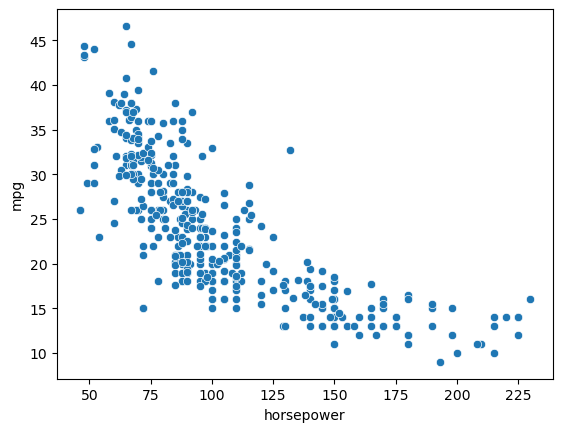

In [33]:
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [37]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)  # バイアス項はいらない(Flase)
X_poly = poly.fit_transform(X)


In [38]:
# 線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [41]:
print(model.coef_)
print(model.intercept_)

[-0.46618963  0.00123054]
56.900099702113124


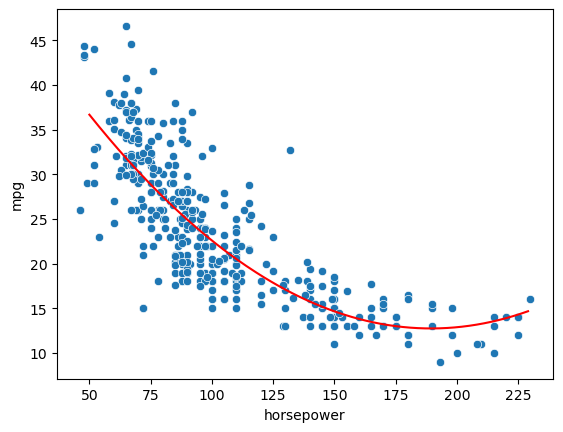

In [39]:
# 描画
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(50, 230).reshape(-1, 1)
# モデルの特徴量が多項式だから、多項式に変換する
x_axis_ = poly.fit_transform(x_axis)
pred = model.predict(x_axis_)
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')